###  Speed checkup for inbuilt functions vs implemented functions
#### Sobel filter : Horizontal : 0.002302885055541992 s  vs 0.3070495128631592 s
####                       Verical: 0.0031337738037109375s vs  0.34451794624328613 s
#### Laplacian filter: 0.0027129650115966797 s vs 0.43250298500061035 s
We can see that the time taken by the inbuilt functions is around 100 times faster than the function implemented by me.
### All the filters taken in theis question are 3\*3  dimension. 

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from skimage import io
import time

In [2]:
def my_conv2(image, filters):
    output = np.zeros(shape=((image.shape[0]-(filters.shape[0])+1),(image.shape[1]-(filters.shape[1])+1)))
    filters = np.flip(np.flip(filters,axis=0),axis=1)
    print("Output shape is ",output.shape)
    k1= (int)((filters.shape[0]-1)/2)
    rem1= filters.shape[0]-(2*k1)
    k2= int((filters.shape[1]-1)/2)
    rem2= filters.shape[1]-(2*k2)
    for i in range(k1,image.shape[0]-k1-1):
        for j in range(k2,image.shape[1]-k2-1):
            image_area= image[i-k1:i+k1+rem1,j-k2:j+k2+rem2]
            temp = np.multiply(image_area,filters)
            temp_sum = np.sum(temp)
            output[i-k1,j-k2]=temp_sum
    return output

In [3]:
image = io.imread('Data/clown.tif',as_gray='True')

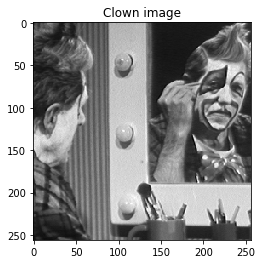

In [4]:
plt.imshow(image,cmap='gray')
plt.title('Clown image')
plt.show()

### Defining the filters

In [5]:
image = np.asarray(image)
vertical_edges = np.asarray([[1,0,-1],[2,0,-2],[1,0,-1]]) # verical edge
horizontal_edges = np.asarray([[1,2,1],[0,0,0],[-1,-2,-1]]) # horizontal edges

#sobel_filter = np.sqrt(np.square(vertical_edges)+np.square(horizontal_edges))

laplacian_filter = np.asarray([[0,-1,0],[-1,4,-1],[0,-1,0]]) # laplacian filter

image=image/255

### Displaying the filters

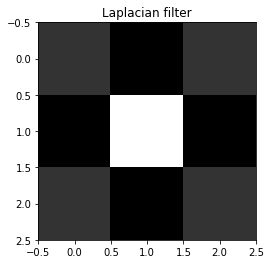

In [6]:
plt.imshow(laplacian_filter,cmap='gray')
plt.title('Laplacian filter')
plt.show()

In [7]:
start_time = time.time()
imageOut_vertical=my_conv2(image, vertical_edges)
end_time = time.time()
print("Time taken for vertical  is", end_time-start_time)

Output shape is  (254, 254)
Time taken for vertical  is 0.3190748691558838


### Vertical edge detection - Sobel filter

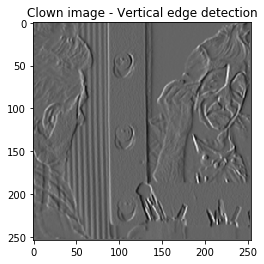

In [8]:
plt.imshow(imageOut_vertical,cmap='gray')
plt.title('Clown image - Vertical edge detection')
plt.show()

In [9]:
start_time = time.time()
imageOut_horizontal=my_conv2(image, horizontal_edges)
end_time = time.time()
print("Time taken for horizontal  is", end_time-start_time)

Output shape is  (254, 254)
Time taken for horizontal  is 0.2681393623352051


### Horizontal edge detection - Sobel filter

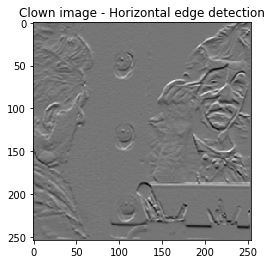

In [10]:
plt.imshow(imageOut_horizontal,cmap='gray')
plt.title('Clown image - Horizontal edge detection')
plt.show()

###  Total edge detection - Sobel filter

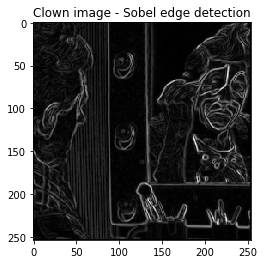

In [11]:
#result = imageOut_horizontal+imageOut_vertical
result = np.sqrt(np.square(imageOut_vertical)+np.square(imageOut_horizontal)) #my_conv2(image, sobel_filter)
plt.imshow(result,cmap='gray')
plt.title('Clown image - Sobel edge detection')
plt.show()

###  Laplacian filter

Output shape is  (254, 254)
Time taken for Laplacian  is 0.2856166362762451


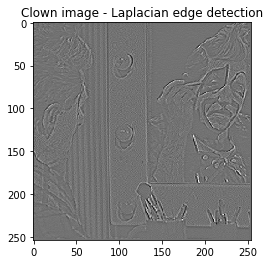

In [12]:
start_time = time.time()
imageOut_laplacian=my_conv2(image, laplacian_filter)
end_time = time.time()
print("Time taken for Laplacian  is", end_time-start_time)
plt.imshow(imageOut_laplacian,cmap='gray')
plt.title('Clown image - Laplacian edge detection')
plt.show()

### We can see that the sobel filter is actually a combination of 2 individual features whereas laplacian filter is just a single filter obtained from second derivative. Sobel filter is affected by noise and produces a thicker edge than compared to Laplacian filter. Sobel filter in fact is more sensitive to diagonal edge than horizontal and vertical edges.  Even LOG is sensitive to noises.

## Part b) For inbuilt functions

### Vertical edge detection - inbuilt function

Time taken for vertical is  0.002020597457885742


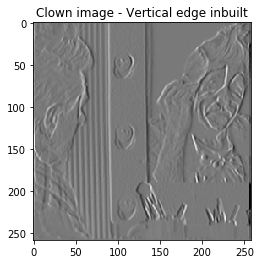

In [13]:
from scipy import signal
start_time = time.time()
imageOut_vertical = signal.convolve2d(image,vertical_edges)
end_time = time.time()
print("Time taken for vertical is ", end_time-start_time)
plt.imshow(imageOut_vertical,cmap='gray')
plt.title('Clown image - Vertical edge inbuilt')
plt.show()

### Horizontal  edge detection - inbuilt function

Time taken for horizontal is 0.0019307136535644531


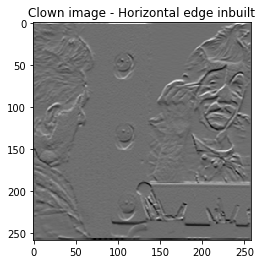

In [14]:
start_time = time.time()
imageOut_horizontal = signal.convolve2d(image,horizontal_edges)
end_time = time.time()
print("Time taken for horizontal is", end_time-start_time)
plt.imshow(imageOut_horizontal,cmap='gray')
plt.title('Clown image - Horizontal edge inbuilt')
plt.show()

### Sobel edge detection - inbuilt function

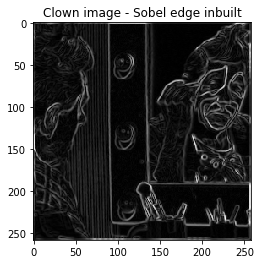

In [15]:
result = np.sqrt(np.square(imageOut_vertical)+np.square(imageOut_horizontal))#signal.convolve2d(image,sobel_filter)
plt.imshow(result,cmap='gray')
plt.title('Clown image - Sobel edge inbuilt')
plt.show()

### Laplacian filter - inbuilt function

Time taken for laplacian is 0.002762317657470703


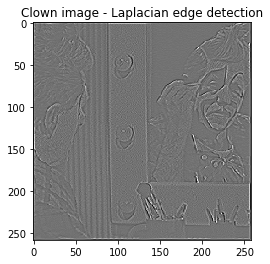

In [16]:
start_time = time.time()
result = signal.convolve2d(image,laplacian_filter)
end_time = time.time()
print("Time taken for laplacian is", end_time-start_time)
plt.imshow(result,cmap='gray')
plt.title('Clown image - Laplacian edge detection')
plt.show()